# Load the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

import os

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read the dataset

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Cardinality
"Cardinality" means the number of unique values in a column

In [4]:
for col in train.columns:
    if train[col].dtype=='object':
        print()
        print(col)
        print('Number of unique values :',train[col].nunique())
        print('Sample unique values :',train[col].unique()[:5])


MSZoning
Number of unique values : 5
Sample unique values : ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street
Number of unique values : 2
Sample unique values : ['Pave' 'Grvl']

Alley
Number of unique values : 2
Sample unique values : [nan 'Grvl' 'Pave']

LotShape
Number of unique values : 4
Sample unique values : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour
Number of unique values : 4
Sample unique values : ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities
Number of unique values : 2
Sample unique values : ['AllPub' 'NoSeWa']

LotConfig
Number of unique values : 5
Sample unique values : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope
Number of unique values : 3
Sample unique values : ['Gtl' 'Mod' 'Sev']

Neighborhood
Number of unique values : 25
Sample unique values : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']

Condition1
Number of unique values : 9
Sample unique values : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']

Condition2
Number of unique values : 8
Sample unique values : ['Norm' 'Artery' 'RRNn' '

# EDA
## Descriptive Analysis

In [5]:
train.describe().style.background_gradient()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Correlation

In [6]:
corr = train.corr()
corr.style.background_gradient()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [7]:
# Extract features with correlation greater than a threshold (e.g., 0.3)
threshold = 0.3
important_features = corr[corr['SalePrice'].abs() > threshold][['SalePrice']]

important_features.style.background_gradient()

,SalePrice
LotFrontage,0.351799
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.386420
TotalBsmtSF,0.613581
1stFlrSF,0.605852
2ndFlrSF,0.319334
GrLivArea,0.708624


In [8]:
train = train[important_features.index.values]
test =test[important_features.index[important_features.index!= 'SalePrice']]

# Check null values

In [9]:
Null = train.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/train.shape[0])*100, 0)
Null.sort_values(by='% Null', ascending = False).style.background_gradient()

,index,Null,% Null
0,LotFrontage,259,18.000000
13,GarageYrBlt,81,6.000000
4,MasVnrArea,8,1.000000
10,FullBath,0,0.000000
17,OpenPorchSF,0,0.000000
16,WoodDeckSF,0,0.000000
15,GarageArea,0,0.000000
14,GarageCars,0,0.000000
12,Fireplaces,0,0.000000
11,TotRmsAbvGrd,0,0.000000


`LotFrontage` has more than 10% missing values so, remove it

# LotFrontage vs Sale Price

In [10]:
# Create the line plot
fig = px.scatter(train, x='LotFrontage', y='SalePrice', 
                 color='LotFrontage',
                 size='SalePrice',
                 template='plotly_dark',
                 title='LotFrontage vs Sale Price')

# Show the plot
fig.show()

pyo.plot(fig, filename = 'LotFrontage vs Sale Price.html', auto_open = False)

'LotFrontage vs Sale Price.html'

In [11]:
train = train.drop('LotFrontage', axis=1)
test = test.drop('LotFrontage', axis=1)

In [12]:
Null = test.isnull().sum().reset_index().rename({0:'Null'}, axis = 1)
Null['% Null'] = round((Null['Null']/test.shape[0])*100, 0)
Null.sort_values(by='% Null', ascending = False).style.background_gradient()

,index,Null,% Null
12,GarageYrBlt,78,5.000000
3,MasVnrArea,15,1.000000
0,OverallQual,0,0.000000
9,FullBath,0,0.000000
15,WoodDeckSF,0,0.000000
14,GarageArea,1,0.000000
13,GarageCars,1,0.000000
11,Fireplaces,0,0.000000
10,TotRmsAbvGrd,0,0.000000
8,GrLivArea,0,0.000000


# GarageYrBlt

In [13]:
# Create the histogram
fig = px.histogram(train, x='GarageYrBlt', 
                   template='plotly_dark',
                   title='Garage Year Built Histogram')

# Show the plot
fig.show()

pyo.plot(fig, filename = 'Garage Year Built Histogram.html', auto_open = False)

'Garage Year Built Histogram.html'

In [14]:
# Forward fill missing values
train['GarageYrBlt'] = train['GarageYrBlt'].ffill()
test['GarageYrBlt'] = test['GarageYrBlt'].ffill()

# GarageYrBlt vs SalePrice

In [15]:
# Create the line plot
fig = px.scatter(train, x='GarageYrBlt', y='SalePrice', 
                 color='GarageYrBlt',
                 size='SalePrice',
                 template='plotly_dark',
                 title='Garage Year Built vs Sale Price')

# Show the plot
fig.show()

pyo.plot(fig, filename = 'Garage Year Built vs Sale Price.html', auto_open = False)

'Garage Year Built vs Sale Price.html'

# MasVnrArea Vs SalePrice

In [16]:
# Create the line plot
fig = px.scatter(train, x='MasVnrArea', y='SalePrice', 
                 color='MasVnrArea',
                 size='SalePrice',
                 template='plotly_dark',
                 title='MasVnrArea vs Sale Price')

# Show the plot
fig.show()

pyo.plot(fig, filename = 'MasVnrArea vs Sale Price.html', auto_open = False)

'MasVnrArea vs Sale Price.html'

In [17]:
train = train.drop('MasVnrArea', axis =1)
test = test.drop('MasVnrArea', axis =1)

# Data Preprocessing

In [18]:
X = train.drop('SalePrice', axis=1)
y = train[['SalePrice']]

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=23)
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((1168, 16), (292, 16), (1168, 1), (292, 1))

In [20]:
numerical_cols = [cname for cname in X_train.columns 
                  if X_train[cname].dtype in ['int64', 'float64']]
numerical_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [21]:
categorical_cols = [cname for cname in X_train.columns 
                    if X_train[cname].dtype == "object"]
categorical_cols

[]

# Scaling the values to convert the int values to Machine Languages

In [22]:
# Preprocessing for numerical data
mmscaler=MinMaxScaler(feature_range=(0,1))
ms = mmscaler.fit(X_train)

# Preprocessing for categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('MinMaxScaler', ms)
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('MinMaxScaler',
                                                  MinMaxScaler())]),
                                 ['OverallQual', 'YearBuilt', 'YearRemodAdd',
                                  'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
                                  '2ndFlrSF', 'GrLivArea', 'FullBath',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                                  'GarageCars', 'GarageArea', 'WoodDeckSF',
                                  'OpenPorchSF']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [23]:
accuracy = {'Model Name':[], 
            'Mean_Absolute_Error_MAE':[] ,
            'Adj_R_Square':[] ,
            'Root_Mean_Squared_Error_RMSE':[] ,
            'Mean_Absolute_Percentage_Error_MAPE':[] ,
            'Mean_Squared_Error_MSE':[] ,
            'Root_Mean_Squared_Log_Error_RMSLE':[] ,
            'R2_score':[]}

Results=pd.DataFrame(accuracy)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


# Build the Regression models

In [24]:
# Import the library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
lg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=700, random_state=23)
svr = SVR()
xgbr = xgb.XGBRegressor(n_estimators=700)
KNN = KNeighborsRegressor(n_neighbors=5)
ETR = ExtraTreesRegressor()

Model = [lg, dt, rf, svr, KNN, ETR, xgbr]

In [26]:
# Evalution matrix for all the algorithms

for model in Model:
    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model with train data
    #model.fit(x_train, y_train)
    my_pipeline.fit(X_train,y_train)
    # Predict the model with test data
    y_pred = my_pipeline.predict(X_valid)
    
    # Print the model name
    print('Model Name: ', model)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_valid, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_valid, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_valid, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_valid, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_valid, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error
    def MAPE (y_valid, y_pred):
        y_valid, y_pred = np.array(y_valid), np.array(y_pred)
        return np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y_valid, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 
    r_squared = round(metrics.r2_score(y_valid, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('******************************************************************************************************************')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : model,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_valid, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_valid, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_valid, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_valid, y_pred))),
               'R2_score' : metrics.r2_score(y_valid, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    print()

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 21230.747
Mean Squared Error (MSE): 781636320.119
Root Mean Squared Error (RMSE): 27957.76
R2_score: 0.844974
Root Mean Squared Log Error (RMSLE): 10.238
Mean Absolute Percentage Error (MAPE): 13.75 %
Adj R Square:  0.843255
******************************************************************************************************************

Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 25303.164
Mean Squared Error (MSE): 1305896002.952
Root Mean Squared Error (RMSE): 36137.183
R2_score: 0.740995
Root Mean Squared Log Error (RMSLE): 10.495
Mean Absolute Percentage Error (MAPE): 50.41 %
Adj R Square:  0.738123
******************************************************************************************************************

Model Name:  RandomForestRegressor(n_estimators=700, random_state=23)
Mean Absolute Error (MAE): 16826.872
Mean Squared Error (MSE): 580844601.448
Root Mean Squared Error (RMSE): 24100.718
R2_s

# Results

In [27]:
Results.style.background_gradient()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),21230.747148,0.843255,27957.759569,13.745554,781636320.119213,10.238450,0.844974
1,DecisionTreeRegressor(),25303.164384,0.738123,36137.183108,50.406025,1305896002.952055,10.495078,0.740995
2,"RandomForestRegressor(n_estimators=700, random_state=23)",16826.871672,0.883521,24100.717862,47.635460,580844601.447735,10.089997,0.884798
3,SVR(),53237.463144,-0.038245,71954.130883,32.889001,5177396951.114893,11.183784,-0.026859
4,KNeighborsRegressor(),20714.356164,0.822599,29742.934661,13.175021,884642162.263836,10.300347,0.824544
5,ExtraTreesRegressor(),16933.582705,0.880536,24407.574475,47.254913,595729691.775420,10.102649,0.881846
6,"XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=700, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",16942.678470,0.882100,24247.233128,48.095178,587928314.356952,10.096058,0.883393


### From the above Results, the Top 2 Models
* RandomForestRegressor
* XGBRegressor

# Using Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

def get_score(n_estimators, X, y, cv):
    
    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=223))
    ])
    scoring = make_scorer(mean_squared_error, greater_is_better=False)  # Use mean squared error as the scoring metric
    scores = -cross_val_score(my_pipeline, X, y,
                              cv=cv,
                              scoring=scoring)
    # Replace this body with your own code
    return scores.mean()

## Check THE SCORE for different-different n_estimators

50 --> 1040055896.0384586
100 --> 1031796580.1717556
150 --> 1030281811.9318798
200 --> 1022392601.5355196
250 --> 1025505046.3319536
300 --> 1023994904.9610298
350 --> 1028194809.3409325
400 --> 1024689335.0371805
450 --> 1022209499.8636802


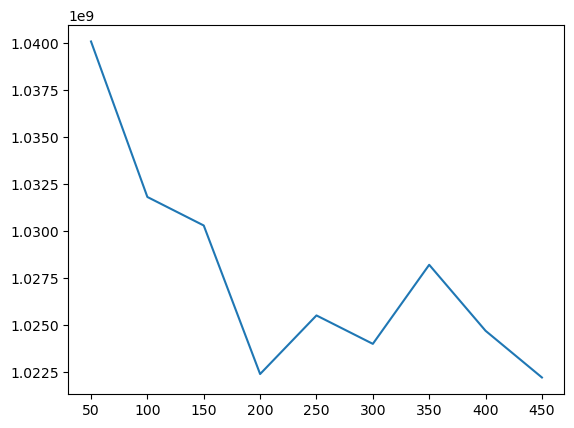

In [29]:
results = {}
for i in range(1,10):
    
    results[i*50] = get_score(i*50, X_train, y_train, 5)
    print(i*50,'-->',results[i*50])
    
plt.plot(list(results.keys()), list(results.values()))
plt.show()

# Neural Network Model

In [30]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization before the input layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45,633
Trainable params: 45,601
Non-trainable params: 32
___________________________________________________

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, 
                    epochs=149, #verbose=0, 
                    validation_data=(X_valid, y_valid))

Epoch 1/149
37/37 [==============================] - 5s 17ms/step - loss: 39779659776.0000 - val_loss: 34491076608.0000
Epoch 2/149
37/37 [==============================] - 0s 4ms/step - loss: 39593730048.0000 - val_loss: 24692051968.0000
Epoch 3/149
37/37 [==============================] - 0s 4ms/step - loss: 38032216064.0000 - val_loss: 4444343808.0000
Epoch 4/149
37/37 [==============================] - 0s 4ms/step - loss: 31144607744.0000 - val_loss: 50845102080.0000
Epoch 5/149
37/37 [==============================] - 0s 4ms/step - loss: 16410998784.0000 - val_loss: 294761594880.0000
Epoch 6/149
37/37 [==============================] - 0s 4ms/step - loss: 7379234816.0000 - val_loss: 238033993728.0000
Epoch 7/149
37/37 [==============================] - 0s 4ms/step - loss: 6314251776.0000 - val_loss: 90447085568.0000
Epoch 8/149
37/37 [==============================] - 0s 4ms/step - loss: 5436757504.0000 - val_loss: 38312497152.0000
Epoch 9/149
37/37 [==============================

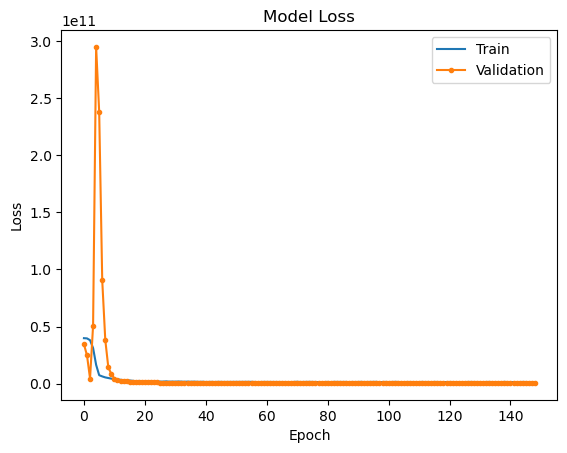

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], marker='.')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [33]:
model.evaluate(X_valid,y_valid)

10/10 [==============================] - 0s 2ms/step - loss: 616941568.0000


616941568.0

# Submissions
Predict the Test value and submit it

In [34]:
preds_test = model.predict(test)

46/46 [==============================] - 0s 2ms/step


In [35]:
# SCategoricalIndexave test predictions to file

# Create a DataFrame with 'Id' and 'SalePrice' columns
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': preds_test.flatten()})  # Flatten the predictions array

# Save the predictions to a CSV file
output.to_csv('submission.csv', index=False)